## Description for 

**Client_num_price.csv**

*   id = client company identifier

●	activity_new = category of the company’s activity

●	channel_sales = code of the sales channel

●	cons_12m = electricity consumption of the past 12 months

●	cons_gas_12m = gas consumption of the past 12 months

●	cons_last_month = electricity consumption of the last month

●	date_activ = date of activation of the contract

●	date_end = registered date of the end of the contract

●	date_modif_prod = date of the last modification of the product

●	date_renewal = date of the next contract renewal

●	forecast_cons_12m = forecasted electricity consumption for next 12 months

●	forecast_cons_year = forecasted electricity consumption for the next calendar year

●	forecast_discount_energy = forecasted value of current discount

●	forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months

●	forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)

●	price_off_peal_var = forecasted energy price for 2nd period (peak)

●	forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)

●	has_gas = indicated if client is also a gas client

●	imp_cons = current paid consumption

●	margin_gross_pow_ele = gross margin on power subscription

●	margin_net_pow_ele = net margin on power subscription

●	nb_prod_act = number of active products and services

●	net_margin = total net margin

●	num_years_antig = antiquity of the client (in number of years)

●	origin_up = code of the electricity campaign the customer first subscribed to

●	pow_max = subscribed power

●	churn = has the client churned over the next 3 months

**price_num_price.csv**

●	id = client company identifier

●	price_date = reference date

●	price_off_peak_var = price of energy for the 1st period (off peak)

●	price_peak_var = price of energy for the 2nd period (peak)

●	price_mid_peak_var = price of energy for the 3rd period (mid peak)

●	price_off_peak_fix = price of power for the 1st period (off peak)

●	price_peak_fix = price of power for the 2nd period (peak)

●	price_mid_peak_fix = price of power for the 3rd period (mid peak)


In [127]:
# num_price analysis and wrangling
import pandas as pd
import numpy as np

# num_price visulisation
import seaborn as sns
import matplotlib.pyplot as plt

# Show plots in jupiter notebook
%matplotlib inline

#  Set plot style
sns.set(color_codes= True)


---

# Loading num_price with pandas

- We need to load `client_num_price.csv` and `price_num_price.csv` into individual num_priceframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [128]:
client_df = pd.read_csv(r"C:\Users\Ankit Singh\Desktop\study\bcs internship\client_num_price.csv")
price_df = pd.read_csv(r"C:\Users\Ankit Singh\Desktop\study\bcs internship\price_num_price.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Ankit Singh\\Desktop\\study\\bcs internship\\client_num_price.csv'

You can view the first 5 rows of a num_priceframe using the `head` method. Similarly, if you wanted to see the last 5, you can use `tail(3)`

In [129]:
client_df.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [130]:
price_df.head(5)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


# Descriptive statistics of num_price

### num_price types

It is usefull to undestand the num_price that we are dealing with along with the num_price types of each column. Depanding upon findings we can carry differnt types of analysis and also check if the num_price type imported correctly in the num_priceframe.

To get an overview of the num_price types within a num_price frame, use the **info()** method.

In [131]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

From above we can see that date_activ, date_end, date_modif_prod and date_renewal is object. In pandas date are stored as a **datetime** num_price type so to perform any date related analysis we need to correct the num_price type.  

In [132]:
date = ["date_activ", "date_end", "date_modif_prod", "date_renewal"]

for i in date:
    client_df[i] = pd.to_datetime(client_df[i])

In [133]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [134]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


we have to convert price date to datetime.

In [136]:
price_df['price_date'] = pd.to_datetime(price_df['price_date'])

In [137]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [138]:
# Understanding the shape of num_pricefrmae
client_df.shape

(14606, 26)

In [139]:
price_df.shape

(193002, 8)

### Statistics

Lets try to undestand more about the num_priceset by performing statistics operation. we can do this by using **describe()** method

In [140]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,1868.614880,1399.762906,0.966726,...,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.995000,0.000000,0.000000,...,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,1112.875000,314.000000,0.000000,...,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2401.790000,1745.750000,0.000000,...,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,...,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000
std,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,3247.786255,5.108289,...,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175


In [141]:
price_df.describe()

,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,2015-06-16 12:50:49.933161216,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
min,2015-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-04-01 00:00:00,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,2015-07-01 00:00:00,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,2015-10-01 00:00:00,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,2015-12-01 00:00:00,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221
std,NaN,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592


As we do not have any missing values we are good to go for next analysis

---

# num_price visualization

1. Churn Percentage

In [160]:
# we going to perform mumerical analysis 
num_price = client_df[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons', 'margin_gross_pow_ele','margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max', 'churn']]

In [161]:
# checking for missing values in num_priceset
missing_values = pd.DataFrame(client_df.isnull().sum()/ len(client_df.index)*100)
missing_values

,0
id,0.0
channel_sales,0.0
cons_12m,0.0
cons_gas_12m,0.0
cons_last_month,0.0
date_activ,0.0
date_end,0.0
date_modif_prod,0.0
date_renewal,0.0
forecast_cons_12m,0.0


In [163]:
# there are many ways to calculate this I am using just one of them
churn_per = pd.DataFrame({'Companies': 100*client_df['churn'].value_counts()/ len(client_df['id'])})
churn_per

,Companies
churn,
0,90.284814
1,9.715186


In [164]:
# let see this in numbers
client_df['churn'].value_counts()

churn
0    13187
1     1419
Name: count, dtype: int64

### Pie chart

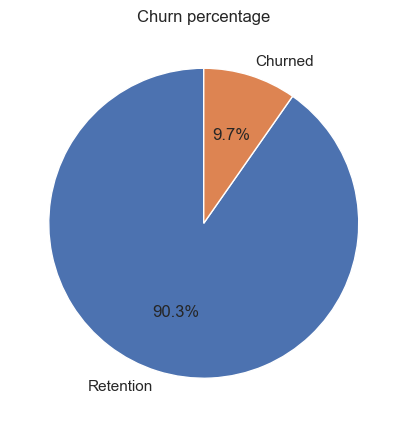

In [165]:
plt.figure(figsize= (5,7))
plt.pie(client_df['churn'].value_counts(), labels= ['Retention', 'Churned'], autopct= '%1.1f%%', startangle=90)
plt.title('Churn percentage')
plt.show()  

About 10% of total customer have churned, it is imblance num_priceset, so this can create problem in model building process. we will handel this probelem later.

In [168]:
num_price.shape

(14606, 18)

To just get quick inside about the num_priceset we are going to see correlation of **churn customers** with all other numerical paremeters.

In [169]:
num_price.corr()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
cons_12m,1.000000,0.488474,0.968212,0.193947,0.167093,-0.043282,0.065268,-0.007748,0.145908,-0.026566,0.159711,-0.011926,-0.011905,0.154251,0.133614,-0.003565,0.082889,-0.045968
cons_gas_12m,0.488474,1.000000,0.507007,0.084359,0.080934,-0.012595,0.041393,-0.017684,0.074002,-0.020558,0.077846,0.006868,0.006852,0.239387,0.070867,-0.013815,0.054317,-0.037957
cons_last_month,0.968212,0.507007,1.000000,0.177773,0.193574,-0.040874,0.057476,-0.005187,0.136802,-0.023017,0.187034,-0.011498,-0.011477,0.169099,0.121835,-0.003677,0.074529,-0.045284
forecast_cons_12m,0.193947,0.084359,0.177773,1.000000,0.647727,0.058435,0.305627,-0.135646,0.254056,-0.018477,0.634600,-0.023220,-0.023231,0.055915,0.768537,0.021283,0.393946,0.012949
forecast_cons_year,0.167093,0.080934,0.193574,0.647727,1.000000,0.008518,0.276009,-0.158012,0.251005,-0.044190,0.969395,-0.010759,-0.010727,0.040426,0.464928,0.048248,0.309647,-0.002558
forecast_discount_energy,-0.043282,-0.012595,-0.040874,0.058435,0.008518,1.000000,-0.008388,0.353735,0.059318,0.048024,0.037939,0.241142,0.240421,0.106812,0.079784,-0.070697,-0.005032,0.017026
forecast_meter_rent_12m,0.065268,0.041393,0.057476,0.305627,0.276009,-0.008388,1.000000,-0.579353,0.706376,-0.203089,0.224212,0.183509,0.183566,0.018109,0.275830,0.071558,0.618549,0.044245
forecast_price_energy_off_peak,-0.007748,-0.017684,-0.005187,-0.135646,-0.158012,0.353735,-0.579353,1.000000,-0.330138,0.630377,-0.092535,0.094498,0.094216,0.035093,-0.135107,-0.168095,-0.384397,-0.010837
forecast_price_energy_peak,0.145908,0.074002,0.136802,0.254056,0.251005,0.059318,0.706376,-0.330138,1.000000,-0.242017,0.212317,0.165483,0.165560,0.044141,0.234942,0.080260,0.411532,0.029315
forecast_price_pow_off_peak,-0.026566,-0.020558,-0.023017,-0.018477,-0.044190,0.048024,-0.203089,0.630377,-0.242017,1.000000,-0.011318,-0.061869,-0.061925,-0.005335,-0.072623,-0.120136,-0.095897,0.014778


let's make this in barchart

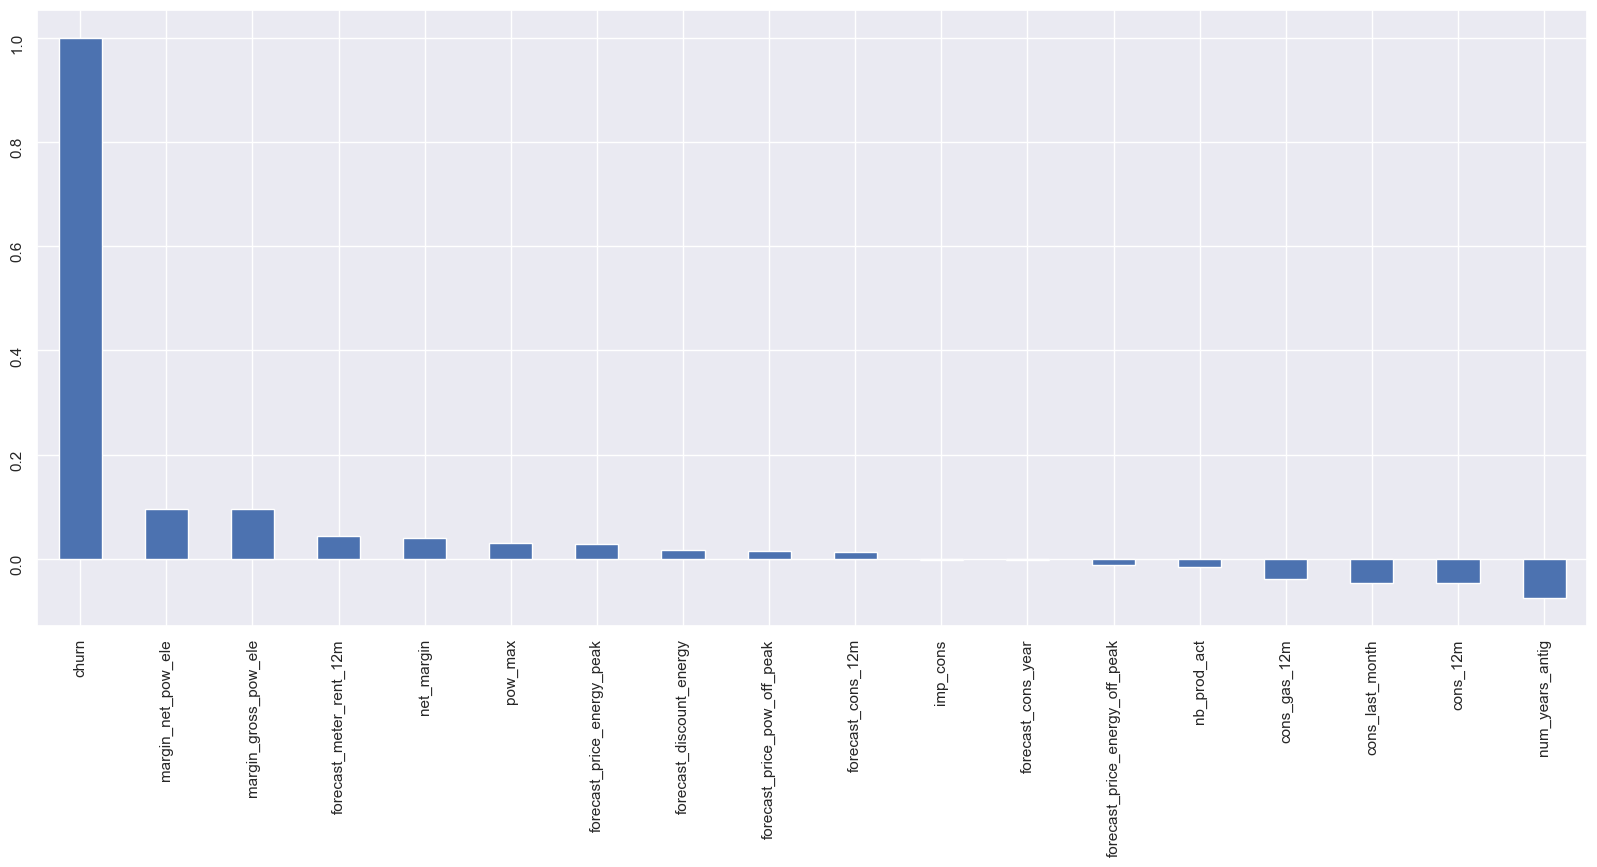

In [170]:
plt.figure(figsize=(20,8))
num_price.corr()['churn'].sort_values(ascending=False).plot(kind='bar')
plt.yticks(rotation = 90)
plt.show()

we can see some positive relation between margin_net_ele, margin_gross_pow_ele and forcast but the corr is not very strong as you can see. Let try to analyse with other variables(categorical variables)

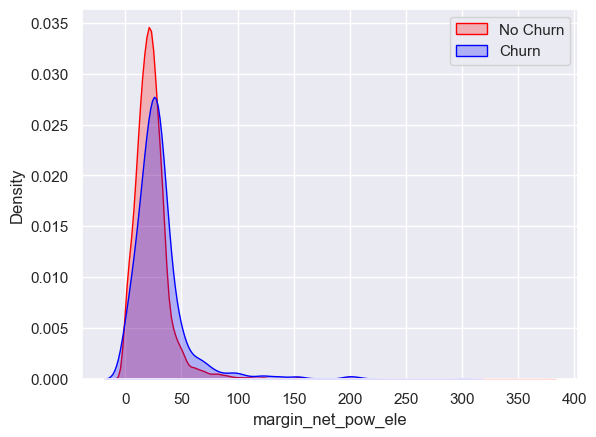

In [171]:
tot = sns.kdeplot(client_df.margin_net_pow_ele[(client_df["churn"]== 0)], color ="Red", fill=  True)
tot = sns.kdeplot(client_df.margin_net_pow_ele[(client_df["churn"]== 1)], color ="Blue", fill = True)
tot.legend(["No Churn", "Churn"], loc ='upper right')

### Categorical variable analysis 

let's see what are the behaviour of customer who are churning for categorical atributes like sales channels, and other paremeters like has gas and no of years they are with us.

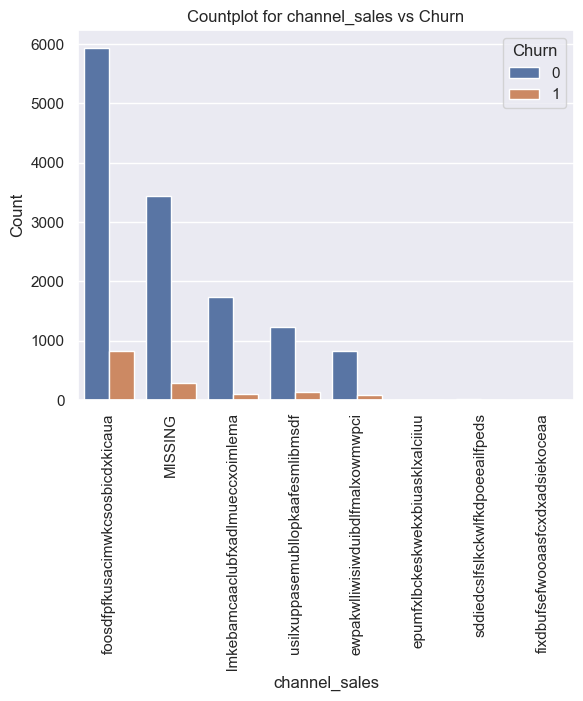

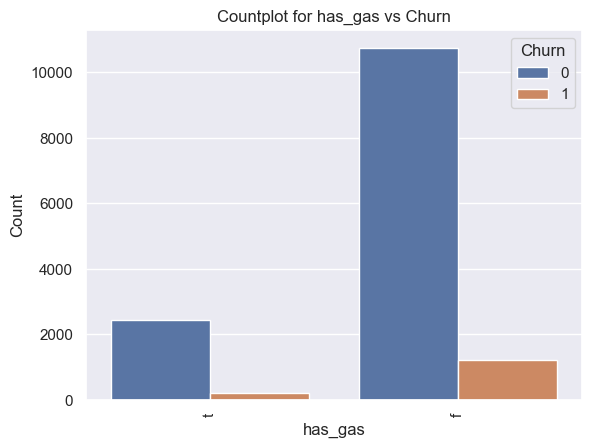

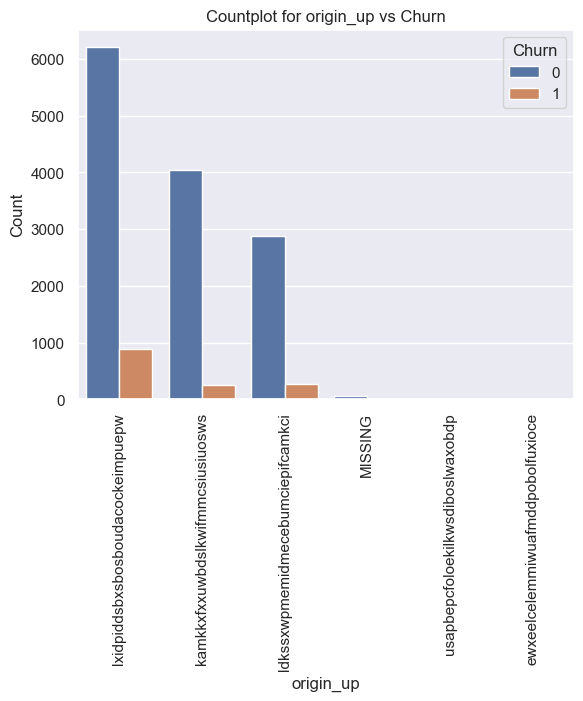

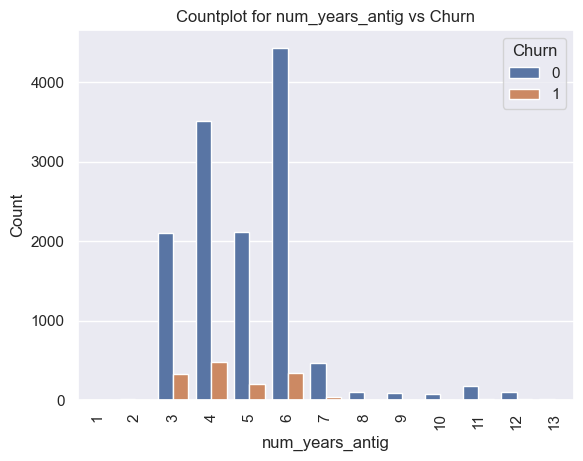

In [173]:
client_df_copy = client_df[['channel_sales', 'has_gas', 'origin_up', 'churn', 'num_years_antig']]

for i, predictor in enumerate(['channel_sales', 'has_gas', 'origin_up', 'num_years_antig']):
    plt.figure(i)
    sns.countplot(data=client_df_copy, x=predictor, hue='churn')
    plt.title(f"Countplot for {predictor} vs Churn")
    plt.xlabel(predictor)
    plt.ylabel("Count")
    plt.legend(title='Churn', loc='upper right')
    plt.xticks(rotation=90)
    plt.show()


**Findings**

1. numbers of churner are more in food.......chanel sales.
2. number of churner are more in people opting for no gas.
3. Code of the electricity campaign the customer first subscribed to or origion lxi...... has more churners.
4. The "Antiquity of the client (in number of years)" typically refers to the length of time or duration since the client first started their association or relationship with the company or service provider.**people who are more than 6 year are no churners** and tends to churn between 3-6 years having 4 years is heighest. 


**Consumption**

Now, we will see the consumption of customers during the last month and 12 months againt the churn. Because this is a numeric - categorical comparison therefore we can use histogram distribution or box plot visualization. 

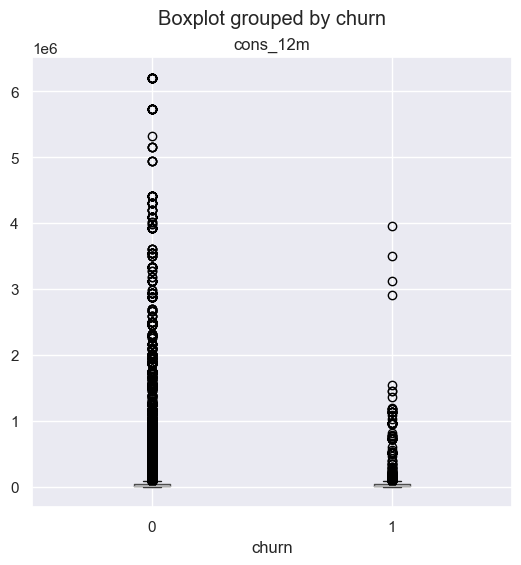

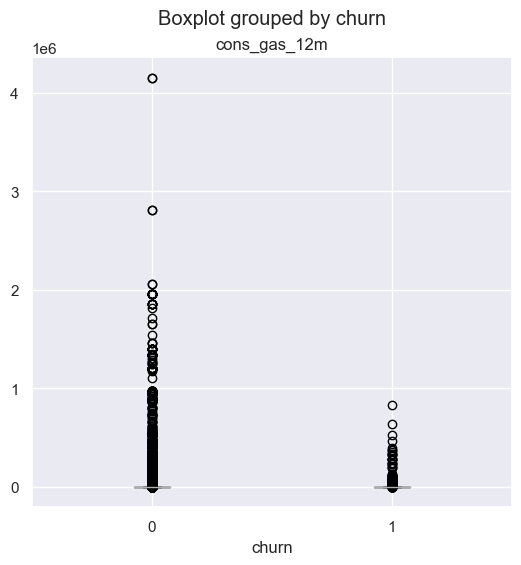

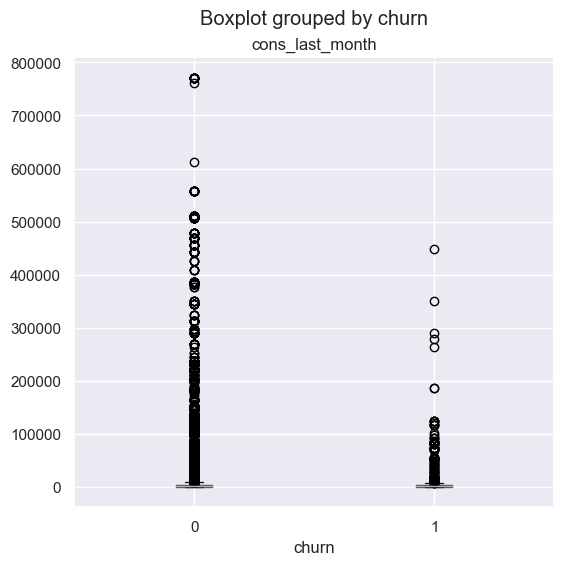

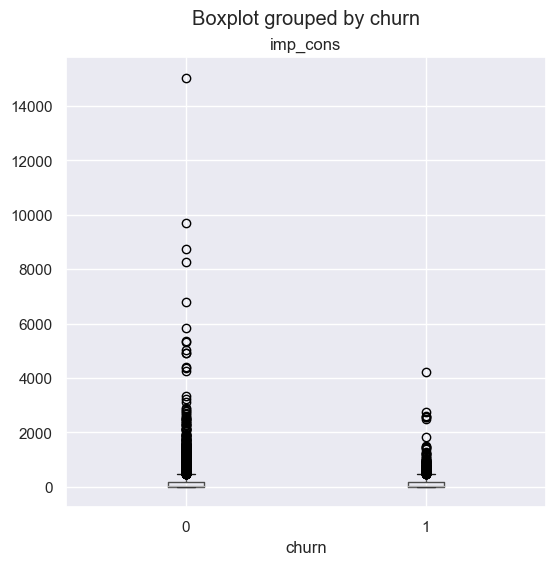

In [174]:
consumption = client_df[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons']]

for con in consumption:
    client_df.boxplot(column=con, by='churn', figsize=(6,6))
    plt.title(con)
plt.show()

We will create a plot_distribution function to see the spread and skewness of the num_price.

In [175]:
churned_customers = client_df[client_df['churn'] == 1]
non_churned_customers = client_df[client_df['churn'] == 0]

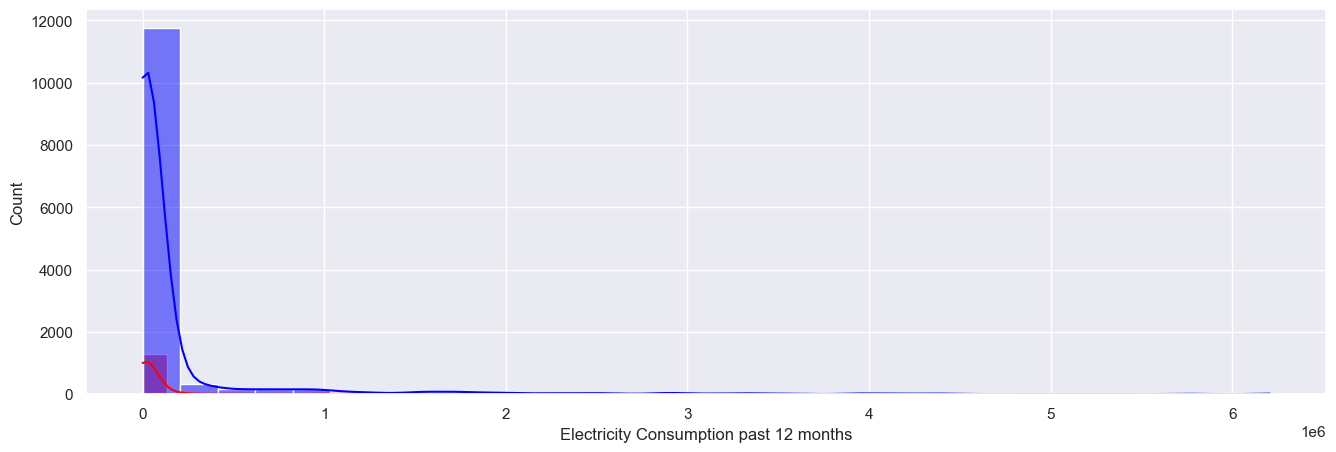

In [176]:
# Histograms for consumption-related variables
plt.figure(figsize=(16, 5))

sns.histplot(churned_customers['cons_12m'], bins=30, kde=True, color='red', label='Churned')
sns.histplot(non_churned_customers['cons_12m'], bins=30, kde=True, color='blue', label='Non-Churned')
plt.xlabel('Electricity Consumption past 12 months')
plt.show()

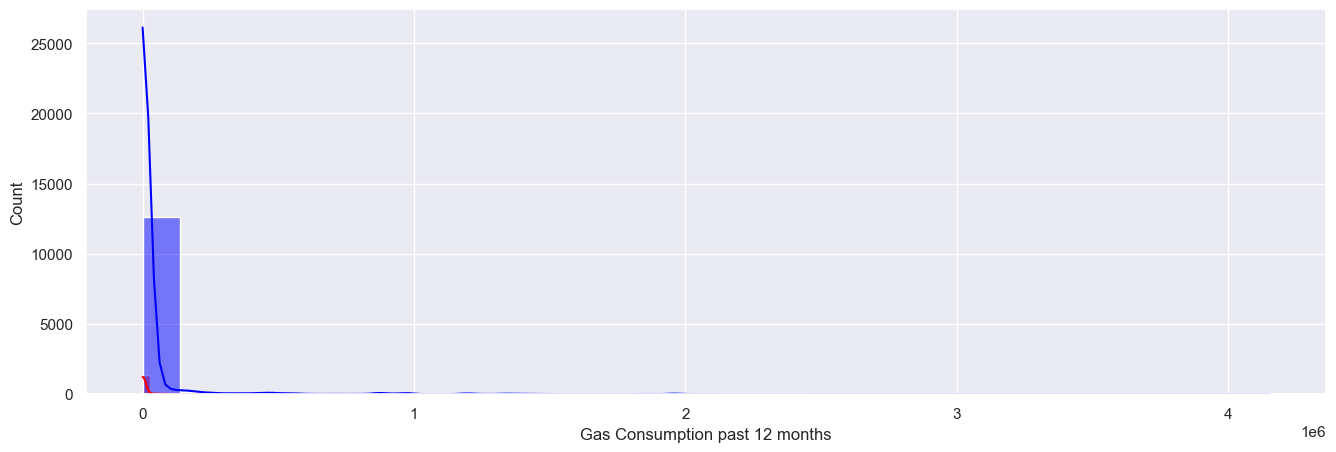

In [177]:
plt.figure(figsize=(16, 5))

sns.histplot(churned_customers['cons_gas_12m'], bins=30, kde=True, color='red', label='Churned')
sns.histplot(non_churned_customers['cons_gas_12m'], bins=30, kde=True, color='blue', label='Non-Churned')
plt.xlabel('Gas Consumption past 12 months')
plt.show()

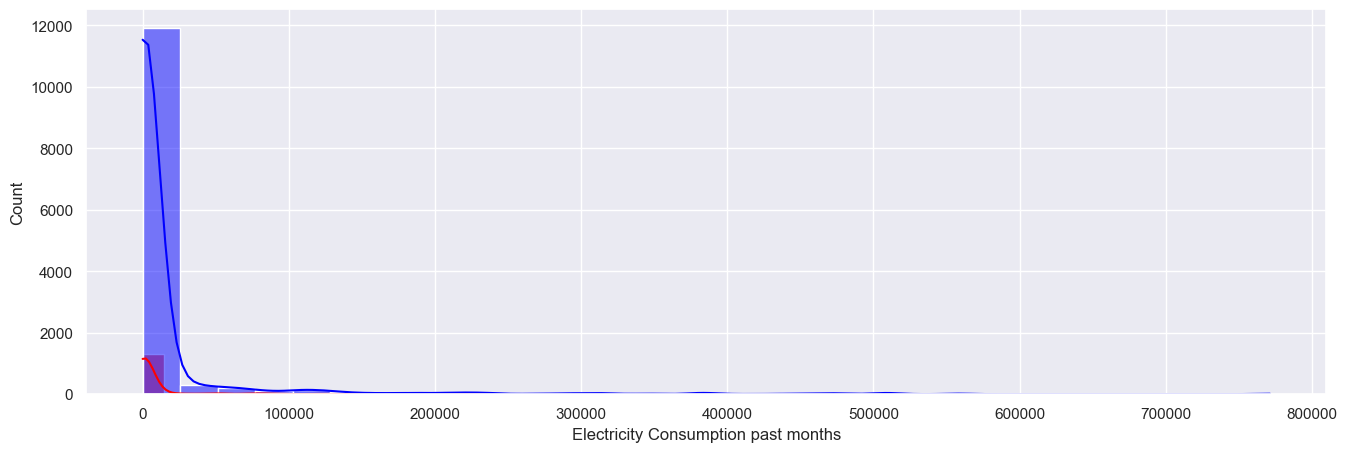

In [178]:
plt.figure(figsize=(16, 5))

sns.histplot(churned_customers['cons_last_month'], bins=30, kde=True, color='red', label='Churned')
sns.histplot(non_churned_customers['cons_last_month'], bins=30, kde=True, color='blue', label='Non-Churned')
plt.xlabel('Electricity Consumption past months')
plt.show()

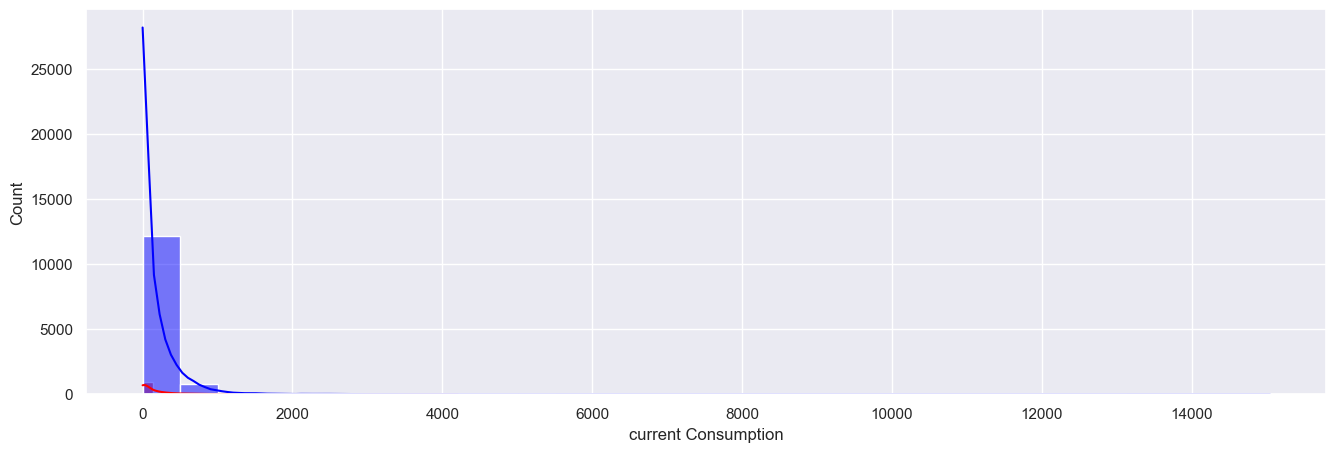

In [179]:
plt.figure(figsize=(16, 5))

sns.histplot(churned_customers['imp_cons'], bins=30, kde=True, color='red', label='Churned')
sns.histplot(non_churned_customers['imp_cons'], bins=30, kde=True, color='blue', label='Non-Churned')
plt.xlabel('current Consumption')
plt.show()

There are a lot of outliers at the upper in the num_priceset and it is highly positive skewed. we'll address skewness and outliers in the feature engineering. 

### Forcast

In [189]:
forecast = client_df[["forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak"]]

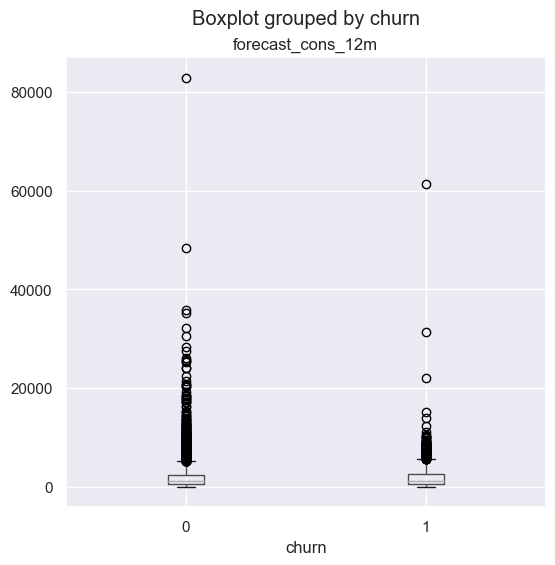

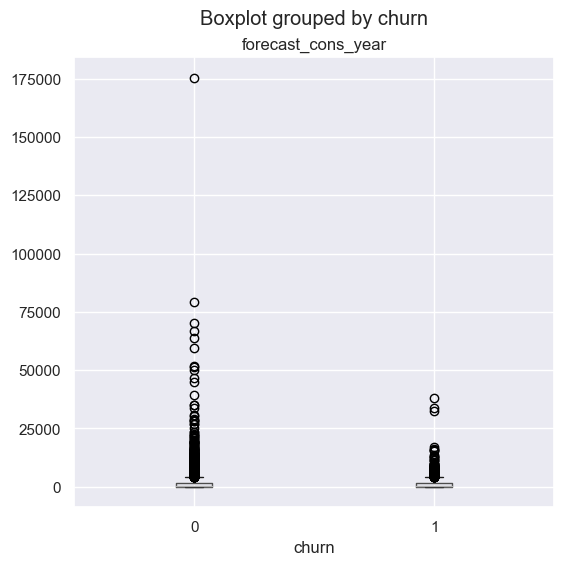

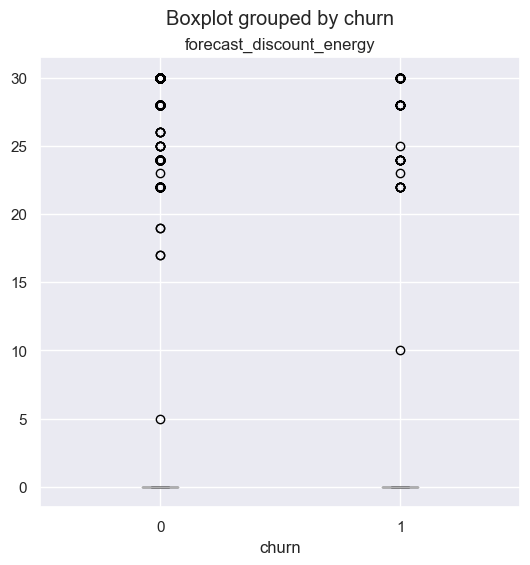

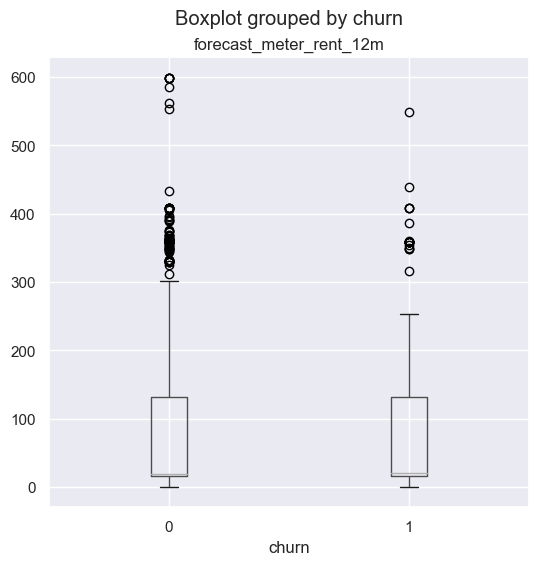

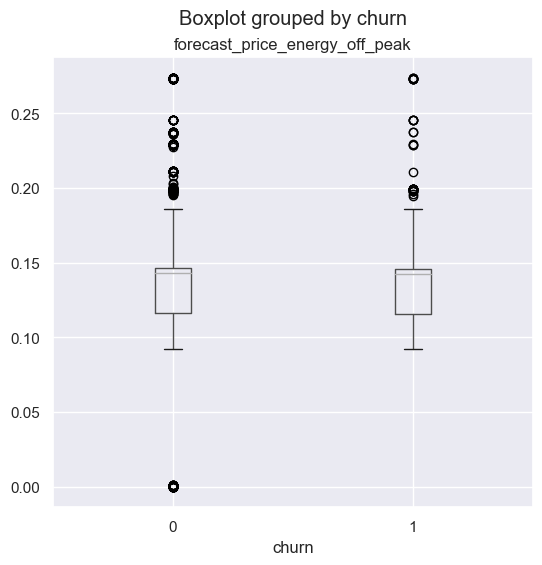

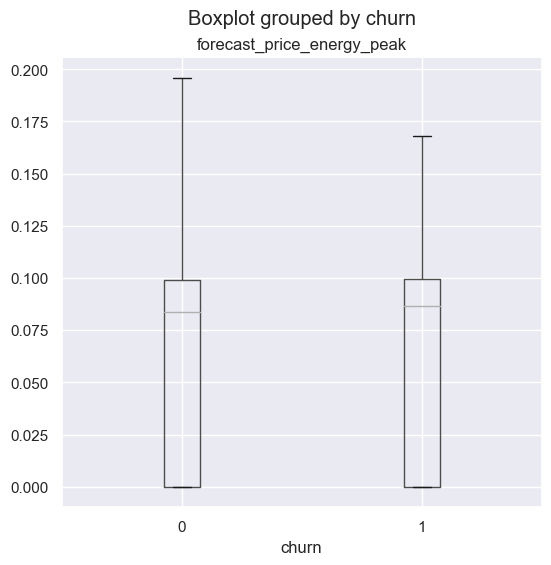

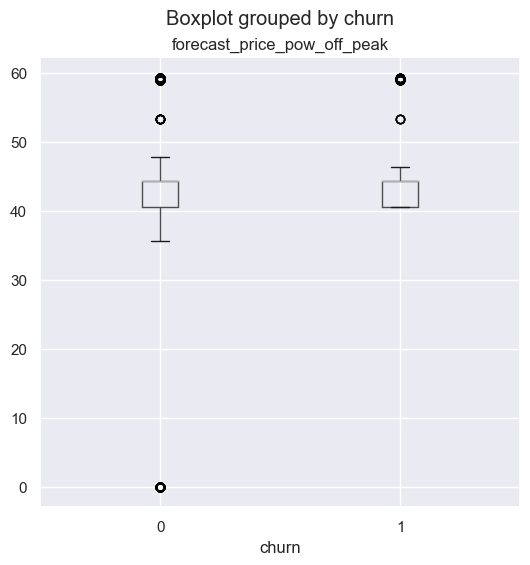

In [190]:
for col in forecast:
    client_df.boxplot(column=col, by='churn', figsize=(6,6))
    plt.title(col)
plt.show()

Checking for Skewens for forcast

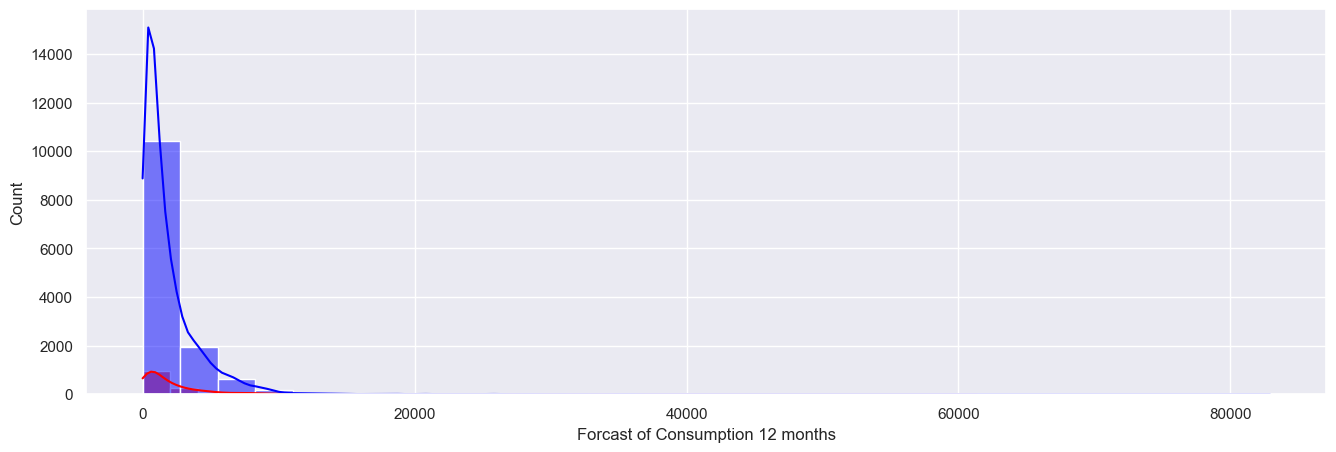

In [191]:
plt.figure(figsize=(16, 5))

sns.histplot(churned_customers['forecast_cons_12m'], bins=30, kde=True, color='red', label='Churned')
sns.histplot(non_churned_customers['forecast_cons_12m'], bins=30, kde=True, color='blue', label='Non-Churned')
plt.xlabel('Forcast of Consumption 12 months')
plt.show()

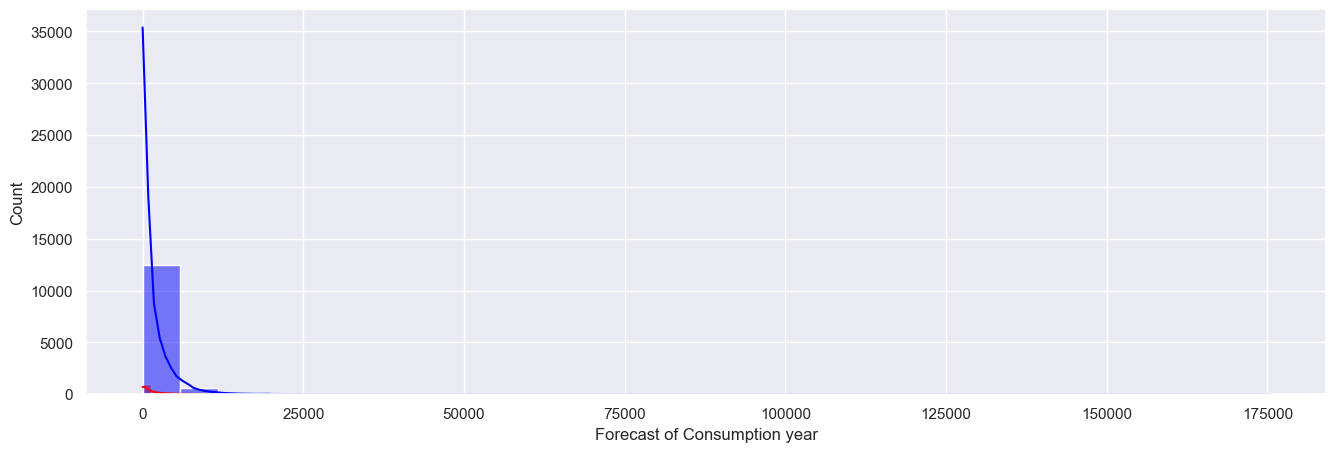

In [192]:
plt.figure(figsize=(16, 5))

sns.histplot(churned_customers['forecast_cons_year'], bins=30, kde=True, color='red', label='Churned')
sns.histplot(non_churned_customers['forecast_cons_year'], bins=30, kde=True, color='blue', label='Non-Churned')
plt.xlabel('Forecast of Consumption year')
plt.show()

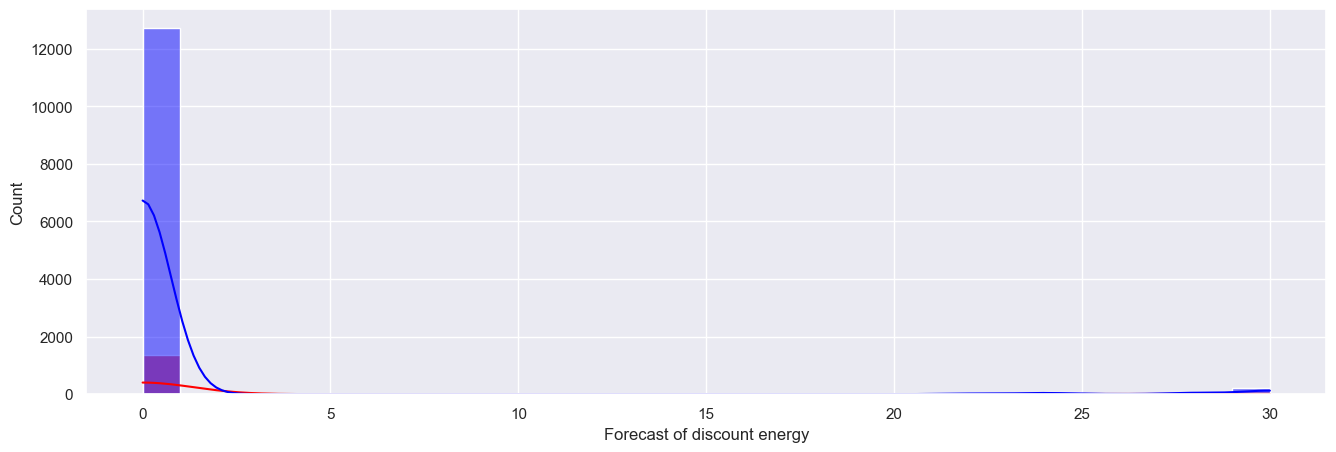

In [193]:
plt.figure(figsize=(16, 5))

sns.histplot(churned_customers['forecast_discount_energy'], bins=30, kde=True, color='red', label='Churned')
sns.histplot(non_churned_customers['forecast_discount_energy'], bins=30, kde=True, color='blue', label='Non-Churned')
plt.xlabel('Forecast of discount energy')
plt.show()

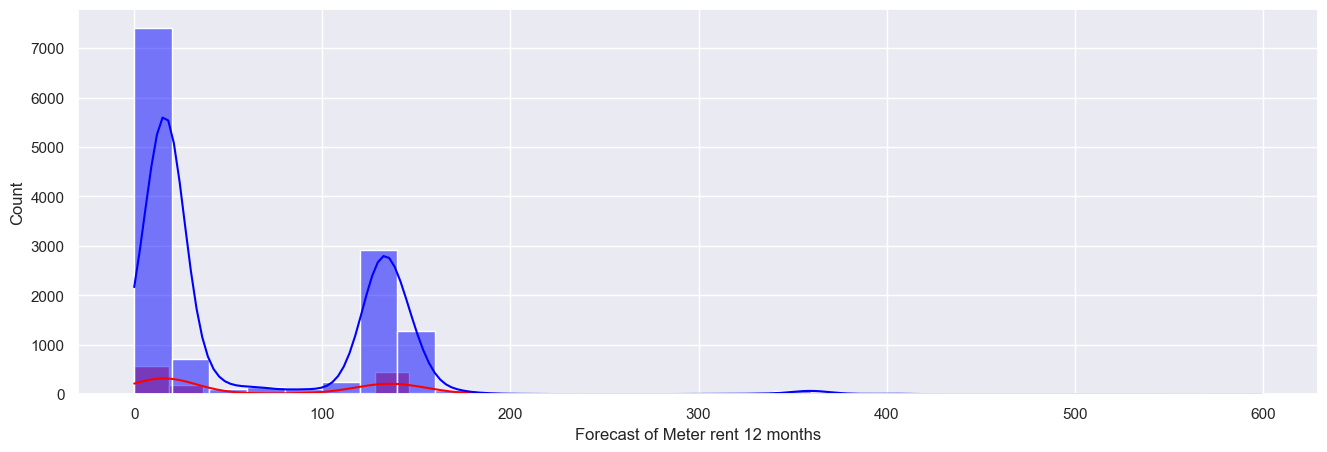

In [194]:
plt.figure(figsize=(16, 5))

sns.histplot(churned_customers['forecast_meter_rent_12m'], bins=30, kde=True, color='red', label='Churned')
sns.histplot(non_churned_customers['forecast_meter_rent_12m'], bins=30, kde=True, color='blue', label='Non-Churned')
plt.xlabel('Forecast of Meter rent 12 months')
plt.show()

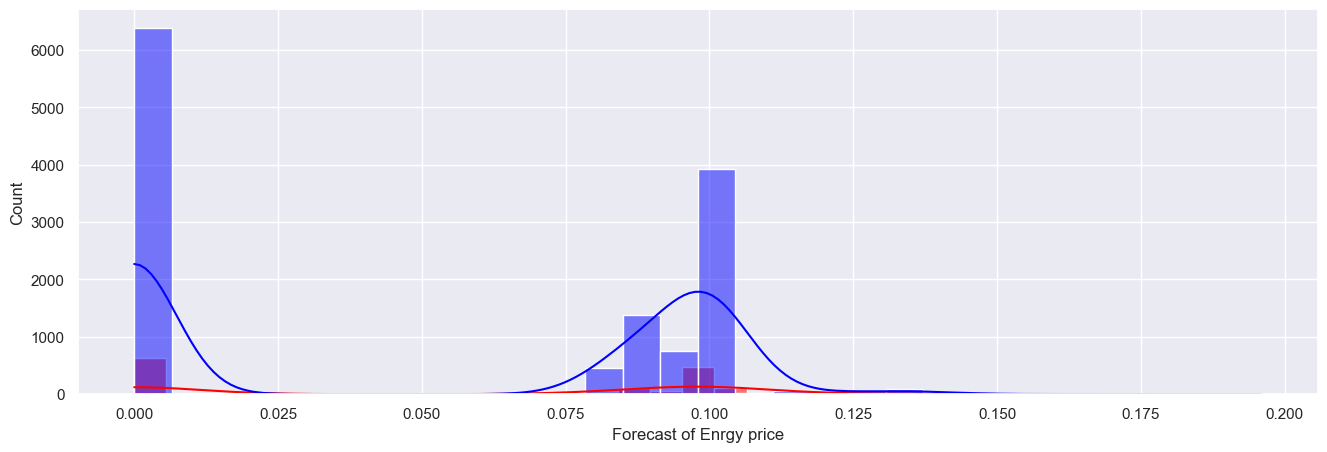

In [195]:
plt.figure(figsize=(16, 5))

sns.histplot(churned_customers['forecast_price_energy_peak'], bins=30, kde=True, color='red', label='Churned')
sns.histplot(non_churned_customers['forecast_price_energy_peak'], bins=30, kde=True, color='blue', label='Non-Churned')
plt.xlabel('Forecast of Enrgy price')
plt.show()

Similar to consumption, forecast variables also show postive skewed.

---
# Let's Check price num_priceset

In [219]:
price_df['id'].value_counts().value_counts()

count
12    15990
11       83
10       11
9         6
8         3
7         3
Name: count, dtype: int64

Most customers have a 12-month price records each. Luckily, every customer has the last-month's reocrd (2015-12-01), this will be helpful in identifying price sensitivity.

In [220]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [221]:
price_df['price_date'].value_counts()

price_date
2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: count, dtype: int64

Checking for correlation in price num_priceset with churn

In [222]:
new_price_df = client_df.merge(price_df, on = 'id', how='inner')
num_price = new_price_df[['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix', 'churn']]
price_df_churn = new_price_df[['id', 'price_date','price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix', 'churn']]

In [223]:
num_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175149 entries, 0 to 175148
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   price_off_peak_var  175149 non-null  float64
 1   price_peak_var      175149 non-null  float64
 2   price_mid_peak_var  175149 non-null  float64
 3   price_off_peak_fix  175149 non-null  float64
 4   price_peak_fix      175149 non-null  float64
 5   price_mid_peak_fix  175149 non-null  float64
 6   churn               175149 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 9.4 MB


In [224]:
num_price.corr()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
price_off_peak_var,1.000000,-0.297574,-0.585341,0.649460,-0.609277,-0.587580,-0.006075
price_peak_var,-0.297574,1.000000,0.815970,-0.203555,0.803983,0.809048,0.029314
price_mid_peak_var,-0.585341,0.815970,1.000000,-0.281289,0.986979,0.990798,0.046120
price_off_peak_fix,0.649460,-0.203555,-0.281289,1.000000,-0.222916,-0.325374,0.016643
price_peak_fix,-0.609277,0.803983,0.986979,-0.222916,1.000000,0.974224,0.046852
price_mid_peak_fix,-0.587580,0.809048,0.990798,-0.325374,0.974224,1.000000,0.044446
churn,-0.006075,0.029314,0.046120,0.016643,0.046852,0.044446,1.000000


<Axes: >

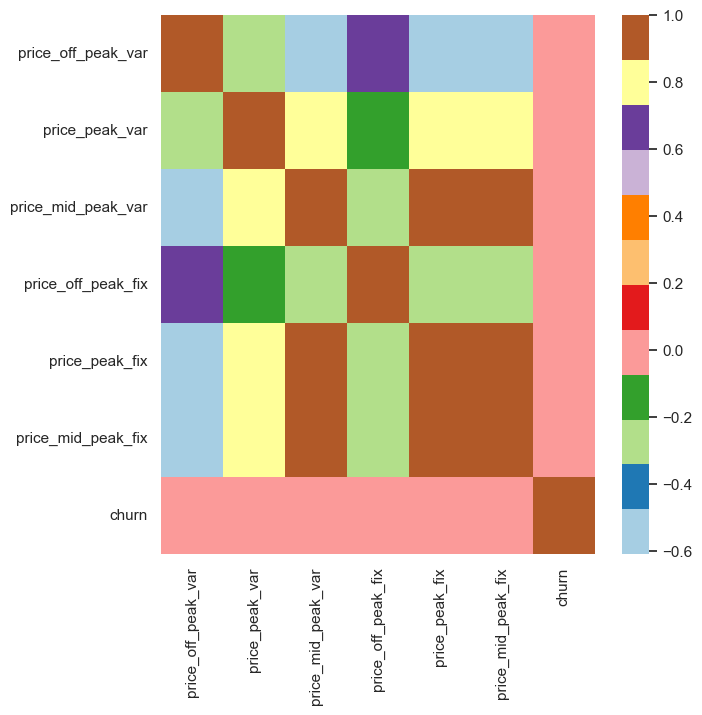

In [225]:
plt.figure(figsize=(7,7))
sns.heatmap(num_price.corr(), cmap= 'Paired')

From the figure above we can see that churn customers are not showing very strong correlation with price but lets invistigate more by defining new price senstivity.

### Ploting histogram of price feature.

In [226]:
churned_customers = num_price[num_price['churn'] == 1]
non_churned_customers = num_price[num_price['churn'] == 0]

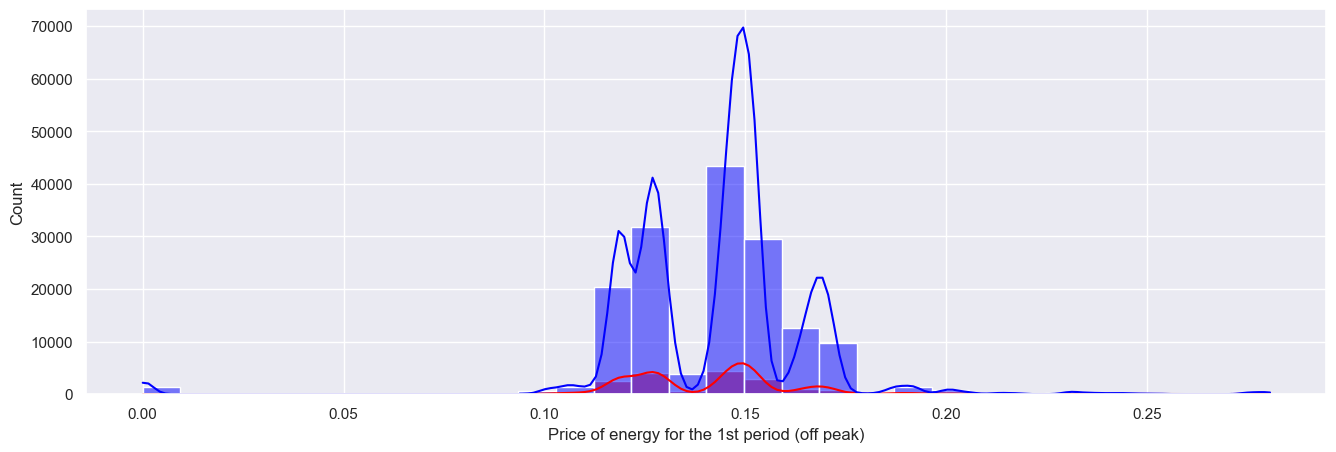

In [227]:
plt.figure(figsize=(16, 5))

sns.histplot(churned_customers['price_off_peak_var'], bins=30, kde=True, color='red', label='Churned')
sns.histplot(non_churned_customers['price_off_peak_var'], bins=30, kde=True, color='blue', label='Non-Churned')
plt.xlabel('Price of energy for the 1st period (off peak)')
plt.show()


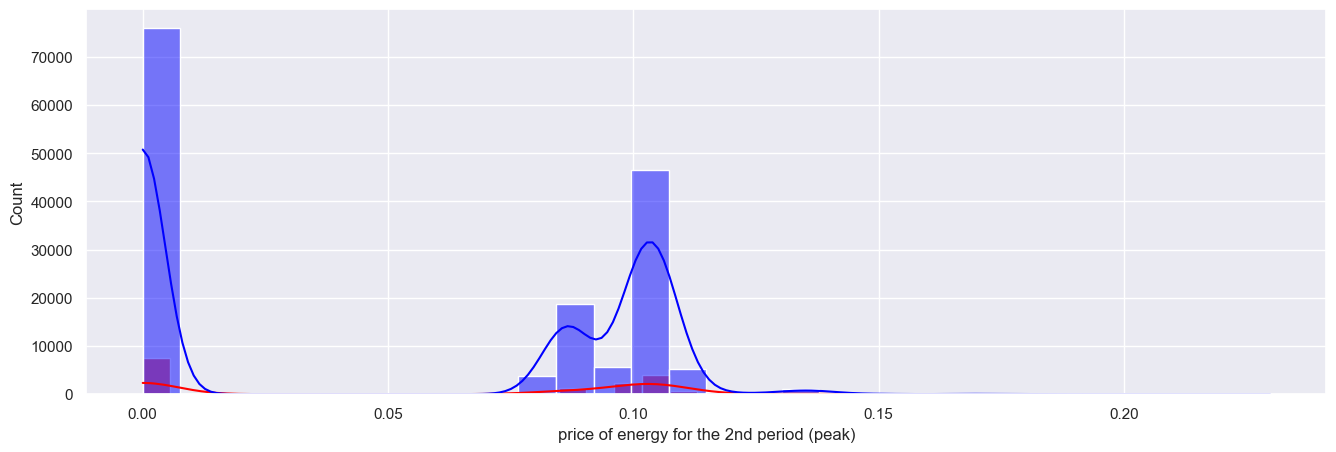

In [228]:
plt.figure(figsize=(16, 5))

sns.histplot(churned_customers['price_peak_var'], bins=30, kde=True, color='red', label='Churned')
sns.histplot(non_churned_customers['price_peak_var'], bins=30, kde=True, color='blue', label='Non-Churned')
plt.xlabel('price of energy for the 2nd period (peak)')
plt.show()


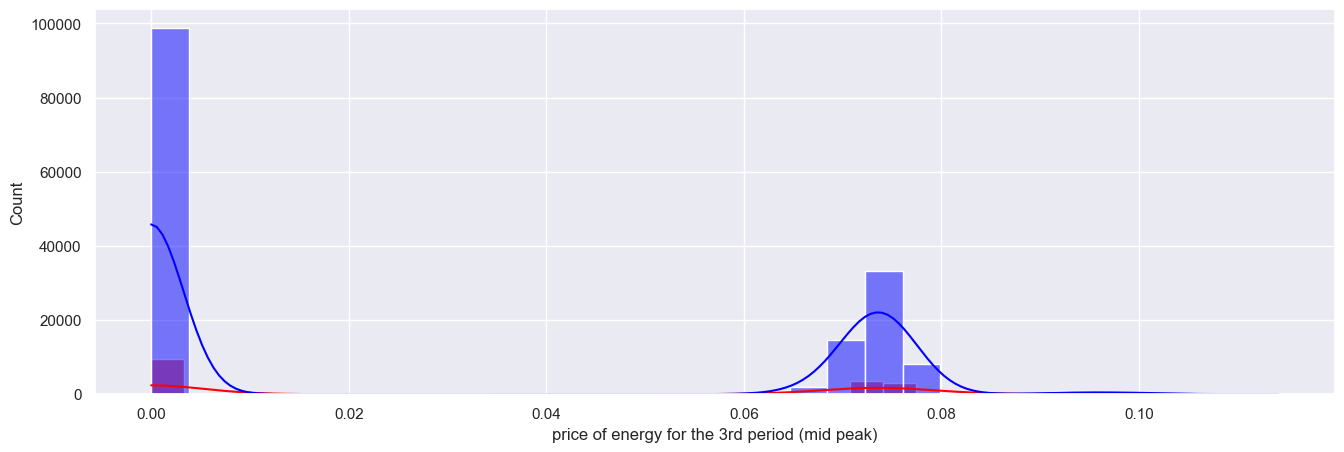

In [229]:
plt.figure(figsize=(16, 5))

sns.histplot(churned_customers['price_mid_peak_var'], bins=30, kde=True, color='red', label='Churned')
sns.histplot(non_churned_customers['price_mid_peak_var'], bins=30, kde=True, color='blue', label='Non-Churned')
plt.xlabel('price of energy for the 3rd period (mid peak)')
plt.show()


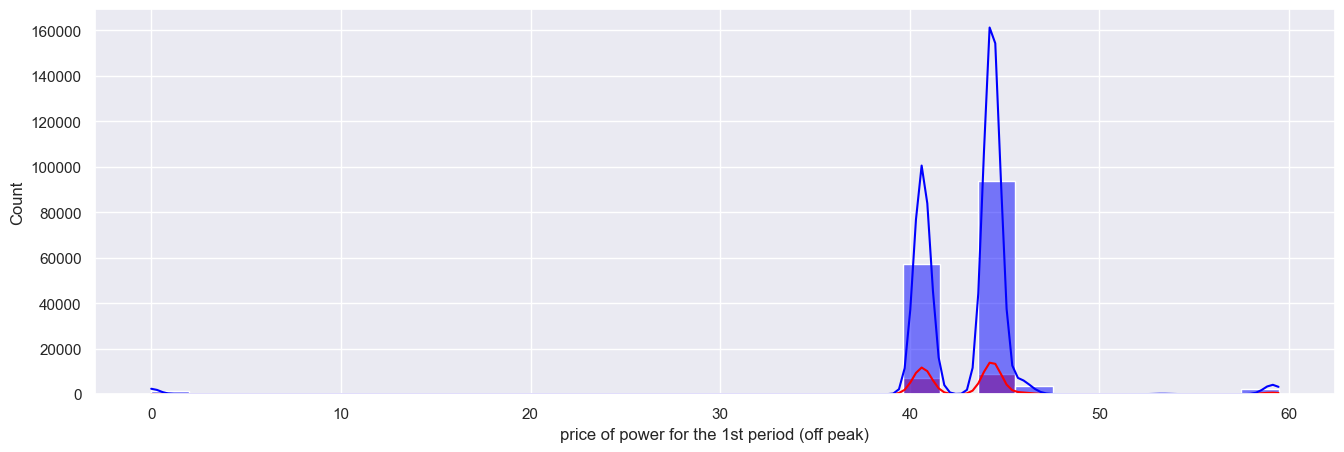

In [230]:
plt.figure(figsize=(16, 5))

sns.histplot(churned_customers['price_off_peak_fix'], bins=30, kde=True, color='red', label='Churned')
sns.histplot(non_churned_customers['price_off_peak_fix'], bins=30, kde=True, color='blue', label='Non-Churned')
plt.xlabel('price of power for the 1st period (off peak)')
plt.show()


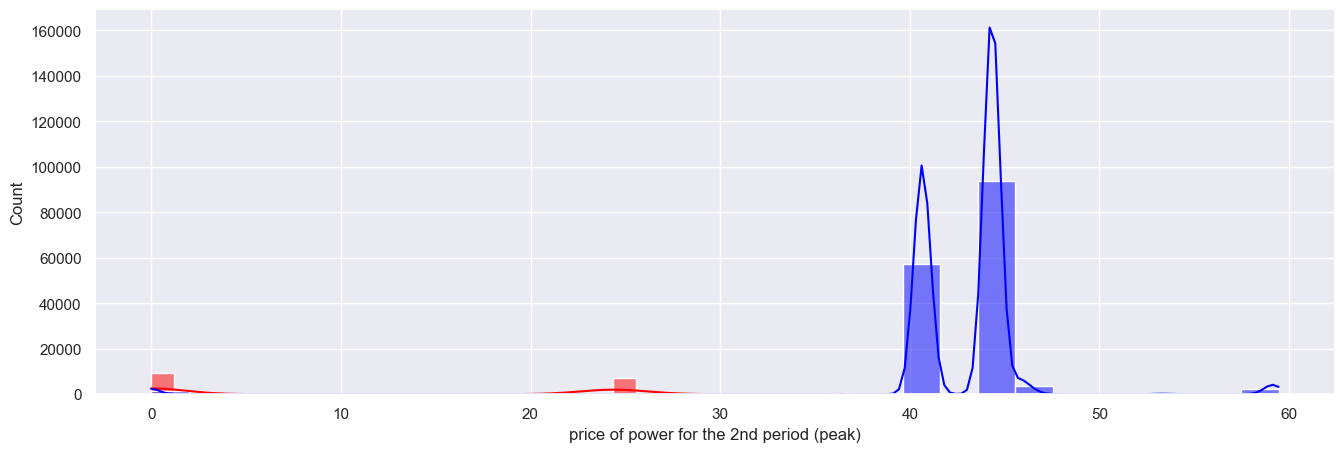

In [231]:
plt.figure(figsize=(16, 5))
sns.histplot(churned_customers['price_peak_fix'], bins=30, kde=True, color='red', label='Churned')
sns.histplot(non_churned_customers['price_off_peak_fix'], bins=30, kde=True, color='blue', label='Non-Churned')
plt.xlabel('price of power for the 2nd period (peak)')
plt.show()


There are lots of 0 peak prices and mid-peak prices, but very few 0 off peak prices. So, I will analyse price sensivity only based on off-peak prices

## Hypothesis Investigation

Now, let's check customers sensitivity to price. When the price increases and some cutomers leave, then we can say these customers are sensitive to price as the increase in prices lead the customer churn. In case there is a decrease or no change in the price and cutomers still switch, it is hard to say these cutomers are sensitive to price.

To determine if customers are price-sensitive and likely to churn based on price changes. we can check the price change over time.
and it's clear from hist plot above we dont have to many variation in peak prices and mid-peak prices so we are going to analyse with off **peak prices**. 

In [232]:
price_df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175149 entries, 0 to 175148
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  175149 non-null  object        
 1   price_date          175149 non-null  datetime64[ns]
 2   price_off_peak_var  175149 non-null  float64       
 3   price_peak_var      175149 non-null  float64       
 4   price_mid_peak_var  175149 non-null  float64       
 5   price_off_peak_fix  175149 non-null  float64       
 6   price_peak_fix      175149 non-null  float64       
 7   price_mid_peak_fix  175149 non-null  float64       
 8   churn               175149 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 12.0+ MB


Since we have the consumption data for each of the companies for the year of 2015, we will create new features to measure price sensitivity using the average of the year, the last 6 months and the last 3 months

- mean_year: This calculates the average prices for each company over the entire year of 2015.
- mean_6m: It calculates the average prices for each company over the last 6 months of 2015 (from June to December).
- mean_3m: This one calculates the average prices for each company over the last 3 months of 2015 (from October to December).

In [233]:
mean_year = price_df_churn.groupby(['id']).mean().reset_index()
mean_6m = price_df_churn[price_df_churn['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = price_df[price_df['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

In [234]:
mean_6m.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
0,0002203ffbb812588b632b9e628cc38d,2015-09-15 20:00:00,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555,0.0
1,0004351ebdd665e6ee664792efc4fd13,2015-09-15 20:00:00,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000,0.0
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-09-15 20:00:00,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000,0.0
3,00114d74e963e47177db89bc70108537,2015-09-15 20:00:00,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000,0.0
4,0013f326a839a2f6ad87a1859952d227,2015-09-15 20:00:00,0.123007,0.104108,0.075469,40.728885,24.43733,16.291555,0.0


- In the subsequent steps, I am renaming the columns to make them clearer and more understandable. changing the names of the columns that represent different aspects of price variation and fixing the prices during off-peak, peak, and mid-peak times.

- Then, summing up the variation and fixed prices for each of these time frames (yearly, 6-month, and 3-month) to get a combined price for off-peak, peak, and mid-peak.

- Essentially, consolidating the information obtained from both variation and fixed prices to create a more comprehensive view of the overall pricing for each customer during these different periods.

- Finally, merging all this information together to create a comprehensive dataset that includes the average prices for each customer across various time frames and the combined prices for different peak times. This will likely help in further analysis to understand how pricing affects customer behavior over time.

In [235]:
mean_year = mean_year.rename(

    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)

In [236]:
mean_year["mean_year_price_off_peak"] = mean_year["mean_year_price_off_peak_var"] + mean_year["mean_year_price_off_peak_fix"]
mean_year["mean_year_price_peak"] = mean_year["mean_year_price_peak_var"] + mean_year["mean_year_price_peak_fix"]
mean_year["mean_year_price_med_peak"] = mean_year["mean_year_price_mid_peak_var"] + mean_year["mean_year_price_mid_peak_fix"]

In [237]:
#rename the columns of mean 6 month
mean_6m = mean_6m.rename(

    columns={
        "price_off_peak_var": "mean_6m_price_off_peak_var",
        "price_peak_var": "mean_6m_price_peak_var",
        "price_mid_peak_var": "mean_6m_price_mid_peak_var",
        "price_off_peak_fix": "mean_6m_price_off_peak_fix",
        "price_peak_fix": "mean_6m_price_peak_fix",
        "price_mid_peak_fix": "mean_6m_price_mid_peak_fix"
    }
)

mean_6m["mean_6m_price_off_peak"] = mean_6m["mean_6m_price_off_peak_var"] + mean_6m["mean_6m_price_off_peak_fix"]
mean_6m["mean_6m_price_peak"] = mean_6m["mean_6m_price_peak_var"] + mean_6m["mean_6m_price_peak_fix"]
mean_6m["mean_6m_price_med_peak"] = mean_6m["mean_6m_price_mid_peak_var"] + mean_6m["mean_6m_price_mid_peak_fix"]

In [238]:
#rename the columns of mean 3 month
mean_3m = mean_3m.rename(

    columns={
        "price_off_peak_var": "mean_3m_price_off_peak_var",
        "price_peak_var": "mean_3m_price_peak_var",
        "price_mid_peak_var": "mean_3m_price_mid_peak_var",
        "price_off_peak_fix": "mean_3m_price_off_peak_fix",
        "price_peak_fix": "mean_3m_price_peak_fix",
        "price_mid_peak_fix": "mean_3m_price_mid_peak_fix"
    }
)

mean_3m["mean_3m_price_off_peak"] = mean_3m["mean_3m_price_off_peak_var"] + mean_3m["mean_3m_price_off_peak_fix"]
mean_3m["mean_3m_price_peak"] = mean_3m["mean_3m_price_peak_var"] + mean_3m["mean_3m_price_peak_fix"]
mean_3m["mean_3m_price_med_peak"] = mean_3m["mean_3m_price_mid_peak_var"] + mean_3m["mean_3m_price_mid_peak_fix"]

In [239]:
# Merge into 1 dataframe
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')

Let's merge the price feature dataset with churn variable to check whether price sensitivity has any correlation with churn.

In [240]:
price_churn = pd.merge(price_features, client_df[['id', 'churn']], on='id')
price_churn.head()

,id,price_date_x,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,churn_x,mean_year_price_off_peak,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_med_peak,churn
0,0002203ffbb812588b632b9e628cc38d,2015-06-16 12:00:00,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,0.0,40.826071,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,2015-06-16 12:00:00,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0.0,44.531877,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-06-16 12:00:00,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0.0,45.501268,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,2015-06-16 12:00:00,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0.0,44.414856,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,2015-06-16 12:00:00,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,0.0,40.854961,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


<Axes: >

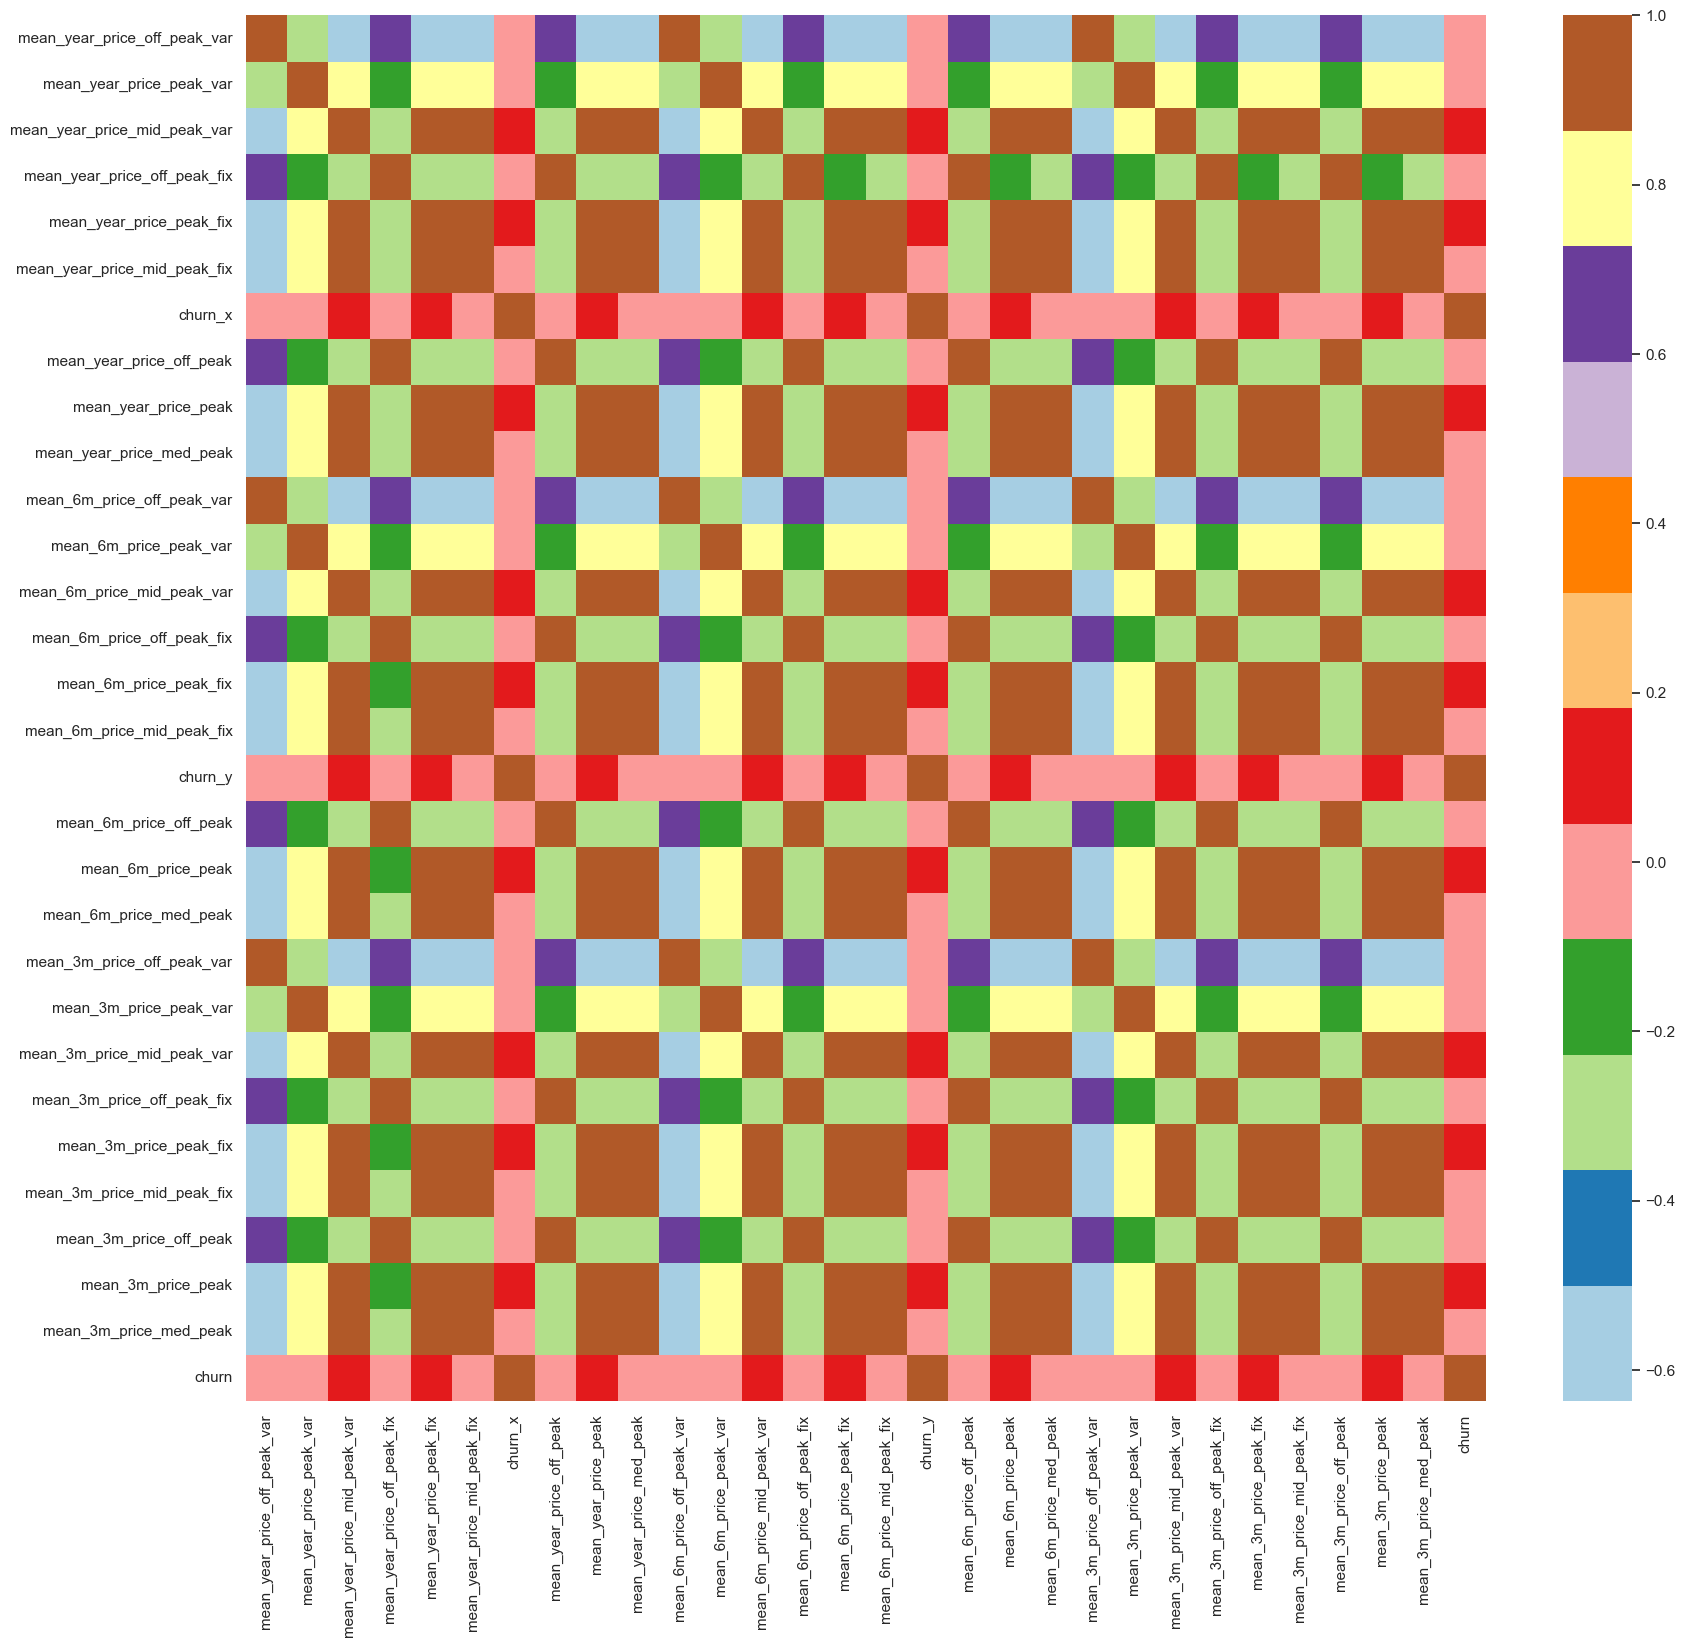

In [246]:
numeric_columns = price_churn.select_dtypes(include='number')
plt.figure(figsize=(20, 18))
sns.heatmap(numeric_columns.corr(), cmap='Paired')


The above plot shows the correlation betweeen price variables with each other and with churn, however, the  correlation between churn and prices variables is very low, which mean customers' churn is not sensitive to price change. 